In [1]:
!pip install git+https://github.com/qgallouedec/Gym-Robotics.git@no_task

  Cloning https://github.com/qgallouedec/Gym-Robotics.git (to revision no_task) to /tmp/pip-req-build-kg9_pjs_
  Running command git clone --filter=blob:none --quiet https://github.com/qgallouedec/Gym-Robotics.git /tmp/pip-req-build-kg9_pjs_
  Running command git checkout -b no_task --track origin/no_task
  Switched to a new branch 'no_task'
  Branch 'no_task' set up to track remote branch 'no_task' from 'origin'.
  Resolved https://github.com/qgallouedec/Gym-Robotics.git to commit c80ccd891bd5944a24c320d752021b04322ddba2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/openai/gym (to revision master) to /tmp/pip-install-yg5_ye17/gym_48df0be8062543a0a208de82d417eb42
  Running command git clone --filter=blob:none --quiet https://github.com/openai/gym /tmp/pip-install-yg5_ye17/gym_48df0be8062543a0a208de82d417eb42
  Resolved https://github.com/openai/gym to commit bf093c68904

False
True
True
True
False


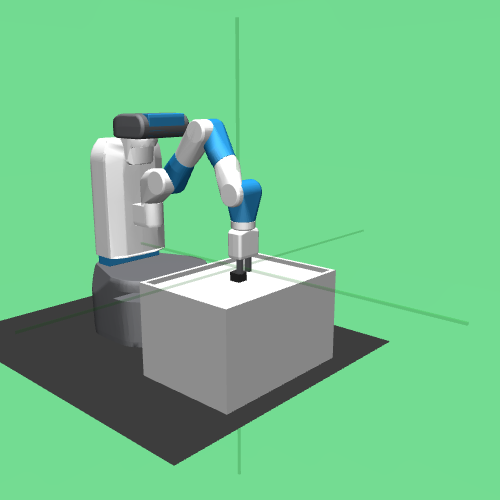

In [7]:
import gym
import gym_robotics
from PIL import Image
import torch
import numpy as np
from go_explore.cells import DownscaleObs


def is_success(cell, goal_cell):
    return np.isclose(cell, goal_cell, atol=0.001).all(-1)


env = gym.make("FetchNoTask-v1")

cell_factory = DownscaleObs(env.observation_space)
step = torch.cat(
    (
        torch.tensor([0.1, 0.1, 0.1]),  # gripper_pos
        torch.tensor([np.inf, np.inf]),  # gripper_width
        torch.tensor([np.inf, np.inf, np.inf]),  # gripper_vel
        torch.tensor([0.1, 0.1, 0.1]),  # object_pos
        torch.tensor([np.inf, np.inf, np.inf]),  # object_rot
        torch.tensor([np.inf, np.inf, np.inf]),  # object_velp
        torch.tensor([np.inf, np.inf, np.inf]),  # object_velr
    )
)
cell_factory.step = step

obs = env.reset()
cell = cell_factory(obs)

for _ in range(5):
    next_obs, _, done, _ = env.step(env.action_space.sample())
    next_cell = cell_factory(next_obs)
    print(is_success(cell, next_cell))
    cell = next_cell
    obs = next_obs

Image.fromarray(env.render("rgb_array"))

In [8]:
from go_explore.go_explore import BaseGoExplore
from stable_baselines3 import SAC

go_explore = BaseGoExplore(
    SAC,
    env,
    cell_factory,
    # model_kwargs=dict(buffer_size=100000, batch_size=64),
    verbose=1,
)

go_explore.explore(500000)
buffer = go_explore.model.replay_buffer

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.5     |
|    ep_rew_mean     | -45      |
|    success_rate    | 0.25     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 144      |
|    time_elapsed    | 1        |
|    total_timesteps | 182      |
| train/             |          |
|    actor_loss      | -4.8     |
|    critic_loss     | 0.223    |
|    ent_coef        | 0.976    |
|    ent_coef_loss   | -0.161   |
|    learning_rate   | 0.0003   |
|    n_updates       | 81       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47.8     |
|    ep_rew_mean     | -47.2    |
|    success_rate    | 0.125    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 98       |
|    time_elapsed    | 3        |
|    total_timesteps | 382      |
| train/             |        

KeyboardInterrupt: 